In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import urllib
import sklearn
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import value_counts as pdc
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.sparse import coo_matrix
from sklearn.utils import resample
%matplotlib inline

In [12]:
fintec = pd.read_csv('./personal_and_behavioral.csv')

In [13]:
fintec

,REPURCHASE,REIMBURSED_YR_TW,ternure_m,recency_m,CLIENT_INCOME,AGE,A,B,C,D,...,AHb,AHb_his,AHc,AHc_his,AHd,AHd_his,VIP,DIGI_FLG,TOPCARD,GENDER
0,0,-0.094496,0.234555,-0.940725,-0.078708,1.768177,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,-0.331596,-1.169085,-0.287347,0.964541,1.496281,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0,-0.316572,1.119927,2.213081,-0.287358,1.387522,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,-0.194912,3.365751,1.811002,-0.287358,1.605039,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,0.283758,0.137380,0.328337,-0.078708,1.278764,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,1,3.783315,1.778558,0.340902,-0.287358,0.734971,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
95404,0,-0.300906,1.541019,1.358664,-0.287358,0.517454,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
95405,0,-0.067562,0.914780,1.848697,-0.287358,0.571834,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
95406,1,-0.190853,1.497830,2.376426,0.338591,0.680592,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [14]:
fintec.REPURCHASE.value_counts()

0    85311
1    10097
Name: REPURCHASE, dtype: int64

In [15]:
fintec.columns[1 : 70]

Index(['REIMBURSED_YR_TW', 'ternure_m', 'recency_m', 'CLIENT_INCOME', 'AGE',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y', 'Z', 'W1', 'W2', 'W3',
       'W4', 'W5', 'W6', 'W7', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07',
       'S08', 'S09', 'S10', 'G0', 'G1', 'G2', 'G3', 'G4', 'SIN', 'SIN_his',
       'REG', 'REG_his', 'ILP', 'ILP_his', 'AHa', 'AHa_his', 'AHb', 'AHb_his',
       'AHc', 'AHc_his', 'AHd', 'AHd_his', 'VIP', 'DIGI_FLG', 'TOPCARD',
       'GENDER'],
      dtype='object')

In [16]:
fin = fintec.to_numpy()

In [28]:
#X = fintec.drop('REPURCHASE',axis=1)

In [29]:
#y = fintec['REPURCHASE']

In [30]:
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [31]:
#train_data = pd.concat([X_train, y_train], axis=1)

In [32]:
#negative = train_data[train_data.REPURCHASE==0]
#positive = train_data[train_data.REPURCHASE==1]

In [33]:
#neg_downsampled = resample(negative,replace=True,n_samples=len(positive), random_state=27)

In [34]:
#downsampled = pd.concat([positive, neg_downsampled])

In [35]:
#downsampled.REPURCHASE.value_counts()

1    7077
0    7077
Name: REPURCHASE, dtype: int64

In [36]:
#downsampled

,REIMBURSED_YR_TW,ternure_m,recency_m,CLIENT_INCOME,AGE,A,B,C,D,E,...,AHb_his,AHc,AHc_his,AHd,AHd_his,VIP,DIGI_FLG,TOPCARD,GENDER,REPURCHASE
18686,0.042820,0.104988,-1.003549,0.547241,0.082420,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
5937,-0.064365,0.849997,0.780675,3.885640,1.496281,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1
13651,-0.141869,-1.633366,-0.827640,0.004752,-2.147128,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
67223,0.081572,0.223757,-0.387866,-0.087054,-1.277061,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
59062,-0.308510,-1.665758,-0.890465,-0.036978,-0.570130,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84582,1.462569,0.720430,0.202687,-0.078708,0.680592,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
72064,-0.282400,-0.121754,-0.802510,-0.120438,-0.950785,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0
9151,-0.229266,-0.542846,0.051908,0.046482,-0.298234,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,0
68412,0.220061,0.590863,0.981715,-0.287358,0.136800,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [37]:
#X = downsampled.drop('REPURCHASE',axis=1)

In [38]:
#y = downsampled['REPURCHASE']

In [39]:
#RE_X = X.to_numpy()

In [40]:
#RE_y = y.to_numpy()

In [24]:
X = fin[:,1:70]
y = fin[:,0:1]
names = fintec.columns[1 : 70]

In [25]:
print (X.shape)

(95408, 69)


In [26]:
X

array([[-0.09449624,  0.23455464, -0.94072463, ...,  0.        ,
         0.        ,  0.        ],
       [-0.33159583, -1.16908502, -0.28734651, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31657155,  1.11992735,  2.21308132, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.06756248,  0.91478001,  1.84869736, ...,  0.        ,
         0.        ,  1.        ],
       [-0.19085316,  1.49783033,  2.37642585, ...,  0.        ,
         0.        ,  0.        ],
       [-0.19240139,  1.28188577, -0.31247643, ...,  0.        ,
         0.        ,  1.        ]])

In [27]:
print (y.shape)

(95408, 1)


In [28]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [29]:
print (names.shape)

(69,)


In [30]:
names


Index(['REIMBURSED_YR_TW', 'ternure_m', 'recency_m', 'CLIENT_INCOME', 'AGE',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y', 'Z', 'W1', 'W2', 'W3',
       'W4', 'W5', 'W6', 'W7', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07',
       'S08', 'S09', 'S10', 'G0', 'G1', 'G2', 'G3', 'G4', 'SIN', 'SIN_his',
       'REG', 'REG_his', 'ILP', 'ILP_his', 'AHa', 'AHa_his', 'AHb', 'AHb_his',
       'AHc', 'AHc_his', 'AHd', 'AHd_his', 'VIP', 'DIGI_FLG', 'TOPCARD',
       'GENDER'],
      dtype='object')

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [32]:
rfc = RandomForestClassifier()
parameters = {'n_estimators': [100], 'max_depth':[10], 'criterion' : ["gini", "entropy"] , 'max_features' :["auto","sqrt", "log2"]}
grid_search = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 2, n_jobs=-1)
grid_search.fit(X_train,y_train.ravel())





GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [34]:
best_para1 = grid_search.best_params_['n_estimators']
print('n_estimators:', best_para1)
best_para2 = grid_search.best_params_['max_depth']
print('max_depth:', best_para2)
best_para3 = grid_search.best_params_['criterion']
print('criterion:', best_para3)
best_para4 = grid_search.best_params_['max_features']
print('max_features:', best_para4)
print("Best score: %0.3f" % grid_search.best_score_)   


n_estimators: 100
max_depth: 10
criterion: gini
max_features: sqrt
Best score: 0.897


In [35]:
rfc = RandomForestClassifier(n_estimators = best_para1 ,max_depth = best_para2, criterion = best_para3, max_features= best_para4)
rfc.fit(X_train,y_train.ravel())
y_predict = rfc.predict(X_test)
print('training score: ',rfc.score(X_train,y_train.ravel()))
print('testing score: ',rfc.score(X_test,y_test))

training score:  0.9026128621696489
testing score:  0.8966565349544073


In [36]:
feature_importances_ = {}
_feat_labels = names
_importances = rfc.feature_importances_

In [37]:
indices = np.argsort(_importances)[::-1]

In [38]:
for f in range(X.shape[1]):
    feature_importances_.update({_feat_labels[indices[f]]:_importances[indices[f]]})

In [39]:
feature_importances_

{'recency_m': 0.14407185674047998,
 'CLIENT_INCOME': 0.10086183924368063,
 'AGE': 0.06659371994933508,
 'S01': 0.06313306984455724,
 'G4': 0.06264312112698414,
 'ternure_m': 0.05546391697312706,
 'REIMBURSED_YR_TW': 0.05206897072335624,
 'G0': 0.04587174559902785,
 'G1': 0.04572383642006166,
 'S02': 0.03448977687677612,
 'AHd_his': 0.02387761733077192,
 'AHd': 0.02185728948918134,
 'ILP': 0.01973570311255167,
 'ILP_his': 0.01957253916151828,
 'SIN_his': 0.019446159787544638,
 'VIP': 0.01688608169889932,
 'W2': 0.014862112669261155,
 'SIN': 0.014189844690624074,
 'S04': 0.012055957323133314,
 'S10': 0.011620002436367204,
 'S03': 0.010887893404535966,
 'S05': 0.009974273391436299,
 'G3': 0.00914425382514093,
 'REG': 0.008787233547884896,
 'AHb_his': 0.008454156518418778,
 'DIGI_FLG': 0.00843162460528096,
 'GENDER': 0.008404216663615904,
 'REG_his': 0.008362612349660327,
 'G2': 0.00828123239137938,
 'AHb': 0.00818118152199409,
 'S06': 0.0073941065595942,
 'W3': 0.0073553037316995504,
 'TO

In [40]:
np.set_printoptions(threshold= sys.maxsize)

In [41]:
print (y_predict.shape)

(28623,)


In [42]:
y_test_re = y_test.reshape(-1)

In [43]:
shoot_times=0
shooted_num=0
target=0

In [44]:
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
for i in range (0,7095):
    
    if y_predict[i] == 1:
     shoot_times = shoot_times + 1

    if y_test_re[i] == y_predict[i] == 1:
     shooted_num = shooted_num + 1
    
    if y_test_re[i] == 1:
     target = target + 1

In [48]:
print("repurchase customer :",target)
print("predict repurchase customer :",shoot_times)
print("actuallyrepurchase customer :",shooted_num)
print(180/285*100,'%')
print((shooted_num/741)*100,'%')

repurchase customer : 741
predict repurchase customer : 61
actuallyrepurchase customer : 42
63.1578947368421 %
5.668016194331984 %


 1) recency_m                      0.144072
 2) CLIENT_INCOME                  0.100862
 3) AGE                            0.066594
 4) S01                            0.063133
 5) G4                             0.062643
 6) ternure_m                      0.055464
 7) REIMBURSED_YR_TW               0.052069
 8) G0                             0.045872
 9) G1                             0.045724
10) S02                            0.034490
11) AHd_his                        0.023878
12) AHd                            0.021857
13) ILP                            0.019736
14) ILP_his                        0.019573
15) SIN_his                        0.019446
16) VIP                            0.016886
17) W2                             0.014862
18) SIN                            0.014190
19) S04                            0.012056
20) S10                            0.011620
21) S03                            0.010888
22) S05                            0.009974
23) G3                          

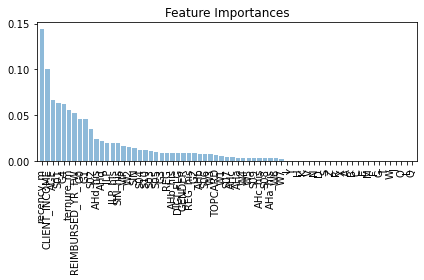

In [49]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            _feat_labels[indices[f]], 
                            _importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        _importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('fig-forest-feature-importances.png', dpi=300)
plt.show()